In [3]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(5)

In [7]:
x_data = np.linspace(0,100,500)

y_data = x_data * 3.1234 + 2.98 + np.random.randn(*x_data.shape) * 0.4

In [8]:
def model(x,w,b):
    return tf.multiply(x,w) + b

In [10]:
w = tf.Variable(1.0,tf.float32)
b = tf.Variable(0.0,tf.float32)

In [11]:
def loss(x,y,w,b):
    err = model(x,w,b) - y   #计算模型预测值和标签值的差异
    squared_err = tf.square(err)  #求平方，得出方差
    return tf.reduce_mean(squared_err)  #求均值,得出均方差

In [19]:
training_epochs = 10  # 迭代次数(训练轮数)
learning_rate = 0.0001  # 学习率

In [20]:
def grad(x,y,w,b):
    with tf.GradientTape() as tape:
        loss_ = loss(x,y,w,b)
    return tape.gradient(loss_,[w,b])   # 返回梯度向量

Training Epoch: 01 Step: 020 loss_nan
Training Epoch: 01 Step: 040 loss_nan
Training Epoch: 01 Step: 060 loss_nan
Training Epoch: 01 Step: 080 loss_nan
Training Epoch: 01 Step: 100 loss_nan
Training Epoch: 01 Step: 120 loss_nan
Training Epoch: 01 Step: 140 loss_nan
Training Epoch: 01 Step: 160 loss_nan
Training Epoch: 01 Step: 180 loss_nan
Training Epoch: 01 Step: 200 loss_nan
Training Epoch: 01 Step: 220 loss_nan
Training Epoch: 01 Step: 240 loss_nan
Training Epoch: 01 Step: 260 loss_nan
Training Epoch: 01 Step: 280 loss_nan
Training Epoch: 01 Step: 300 loss_nan
Training Epoch: 01 Step: 320 loss_nan
Training Epoch: 01 Step: 340 loss_nan
Training Epoch: 01 Step: 360 loss_nan
Training Epoch: 01 Step: 380 loss_nan
Training Epoch: 01 Step: 400 loss_nan
Training Epoch: 01 Step: 420 loss_nan
Training Epoch: 01 Step: 440 loss_nan
Training Epoch: 01 Step: 460 loss_nan
Training Epoch: 01 Step: 480 loss_nan
Training Epoch: 01 Step: 500 loss_nan
Training Epoch: 02 Step: 520 loss_nan
Training Epo

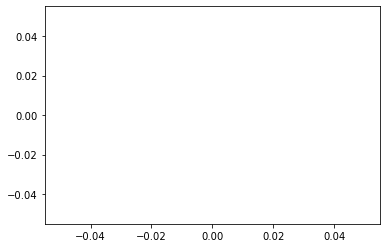

In [21]:
step = 0  #记录训练的步数
loss_list = []  #用于保存loss值的列表
display_step = 20 # 控制训练过程数据显示的频率，不是超参数

for epoch in range(training_epochs):
    for xs,ys in zip(x_data,y_data):
        
        loss_ = loss(xs,ys,w, b)   #计算损失
        loss_list.append(loss_)    #保存本次损失计算结果
        
        delta_w,delta_b = grad(xs,ys,w,b)   #计算当前[w,b]点的梯度
        change_w = delta_w * learning_rate  #计算变量w需要改变的量
        change_b = delta_b * learning_rate  #计算变量b需要改变的量
        w.assign_sub(change_w)              #变量w值变更为减去change_w后的值
        b.assign_sub(change_b)              #变量b值变更为减去change_w后的值
        
        step = step+1                       #训练步数加一
        if step % display_step==0:          #显示训练过程
            print("Training Epoch:",'%02d'%(epoch+1),"Step: %03d"%(step),"loss_%.f"%(loss_))
    plt.plot(x_data,w.numpy() * x_data + b.numpy())    # 完成一轮训练后，画出图像